In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ast import literal_eval

This reads output files generated by running m5_by_amp_scripts.py for a series of different readout options (readnoise_13040.pickle, etc. generated by the camera team). 

In [20]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
# Fiducial M5 values from the SRD
m5_fid = {'u': 23.9, 'g': 25.0, 'r': 24.7, 'i': 24.0, 'z': 23.3, 'y': 22.1}
m5_min = {'u': 23.4, 'g': 24.6, 'r': 24.3, 'i': 23.6, 'z': 22.9, 'y': 21.7}

In [21]:
#Run 13040 has 2.232 sec Readout
#Run 13057 has 2.090 sec Readout
#Run 13060 has 2.374 sec Readout

series = {13057: 2.090, 13040: 2.232, 13060: 2.374}


m5_215 = {}
m5_130 = {}
med_215 = {}
med_130 = {}
for s in series:
    dfPath = os.path.join('m5_output', f'm5df_{s}.csv')
    df = pd.read_csv(dfPath, index_col=0)
    m5_215[s] = {}
    m5_130[s] = {}
    med_215[s] = {}
    med_130[s] = {}
    for f in filterlist:
        m5_215[s][f] = {}
        m5_130[s][f] = {}
        # Join all the amp together into a big list for the whole focal plane
        for k in df:
            a = np.array(df[k].apply(literal_eval)[f'{f}'])
            b = np.array(df[k].apply(literal_eval)[f'{f}_30'])
            a = a[np.where(a > 0)]
            b = b[np.where(b > 0)]
            m5_215[s][f][k] = a
            m5_130[s][f][k] = b
        med_215[s][f] = np.median(np.concatenate(list(m5_215[s][f].values())))
        med_130[s][f] = np.median(np.concatenate(list(m5_130[s][f].values())))

Text(0.5, 0, 'm5 u band 2x15s')

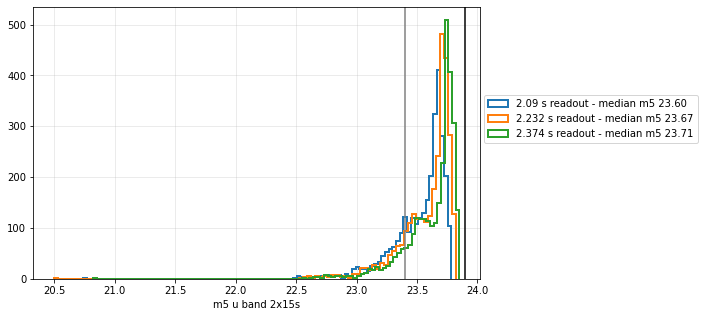

In [22]:
f = 'u'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_215[s][f].values()))
    n,b,p = plt.hist(a, bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_215[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 u band 1x30s')

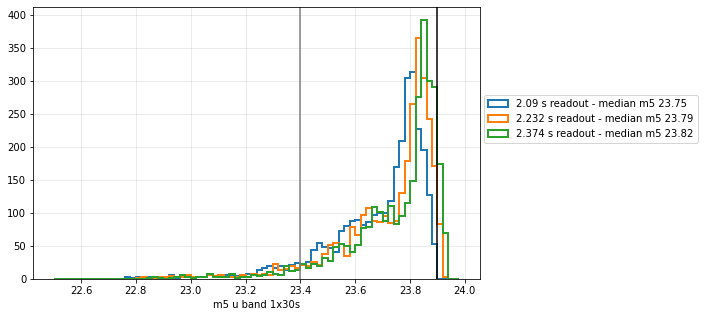

In [23]:
f = 'u'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_130[s][f].values()))
    n,b,p = plt.hist(a, bins=np.arange(22.5, 24, 0.02), histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_130[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

Text(0.5, 0, 'm5 g band 2x15s')

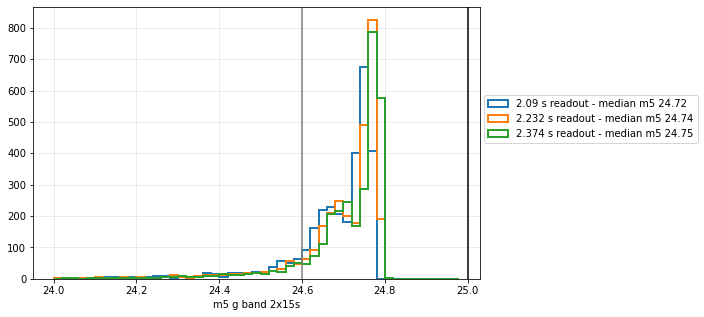

In [24]:
f = 'g'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_215[s][f].values()))
    n,b,p = plt.hist(a, bins=np.arange(24.0, 25.0, 0.02), histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_215[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 g band 1x30s')

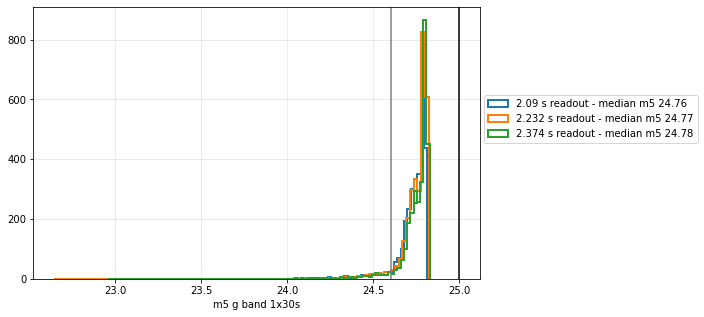

In [29]:
f = 'g'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_130[s][f].values()))
    n,b,p = plt.hist(a, bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_130[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

Text(0.5, 0, 'm5 r band 2x15s')

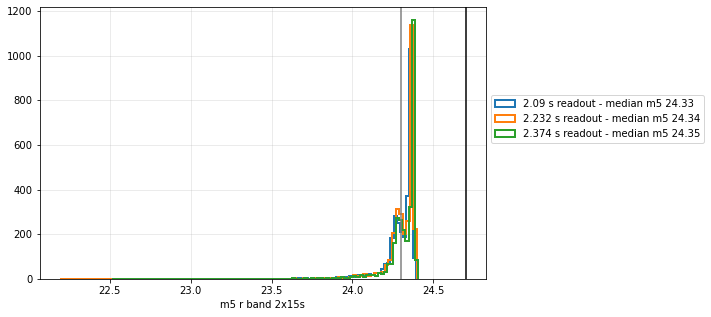

In [30]:
f = 'r'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_215[s][f].values()))
    n,b,p = plt.hist(a, bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_215[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 r band 1x30s')

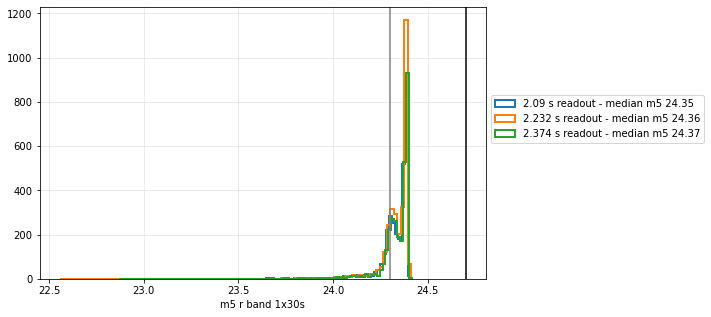

In [31]:
f = 'r'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_130[s][f].values()))
    n,b,p = plt.hist(a, bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_130[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

Text(0.5, 0, 'm5 i band 2x15s')

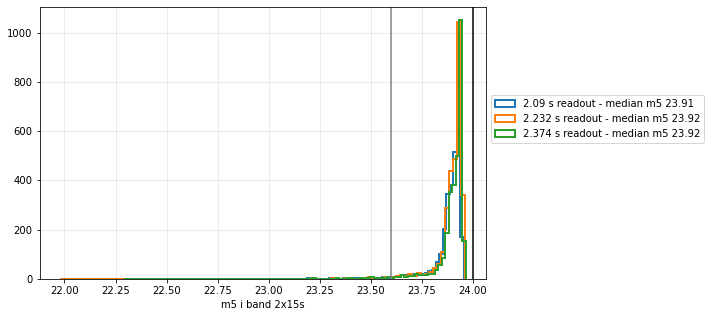

In [33]:
f = 'i'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_215[s][f].values()))
    n,b,p = plt.hist(a, bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_215[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 i band 1x30s')

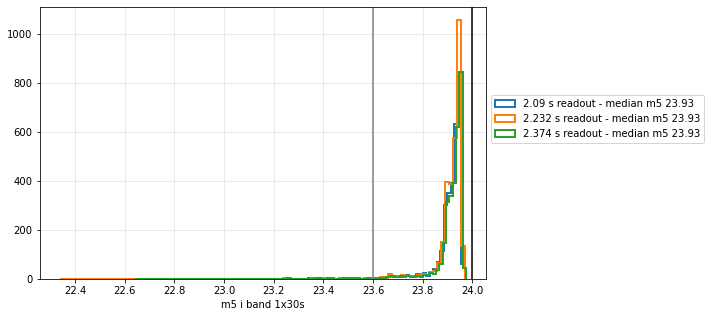

In [38]:
f = 'i'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_130[s][f].values()))
    n,b,p = plt.hist(a, bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_130[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

Text(0.5, 0, 'm5 z band 2x15s')

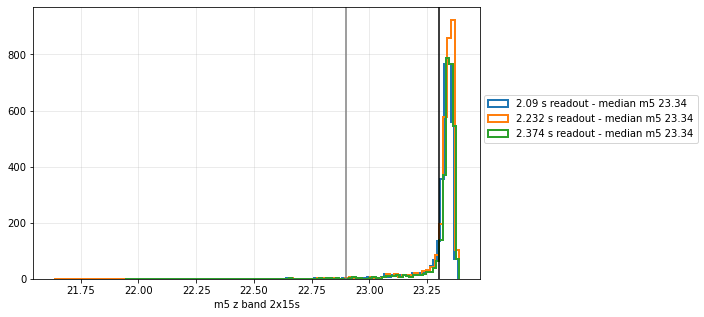

In [39]:
f = 'z'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_215[s][f].values()))
    n,b,p = plt.hist(a, bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_215[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 z band 1x30s')

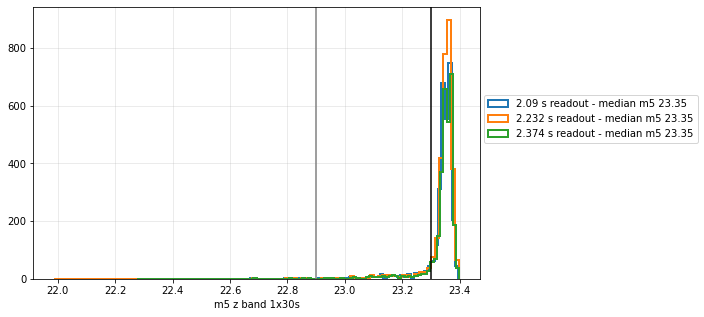

In [40]:
f = 'z'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_130[s][f].values()))
    n,b,p = plt.hist(a, bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_130[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

Text(0.5, 0, 'm5 y band 2x15s')

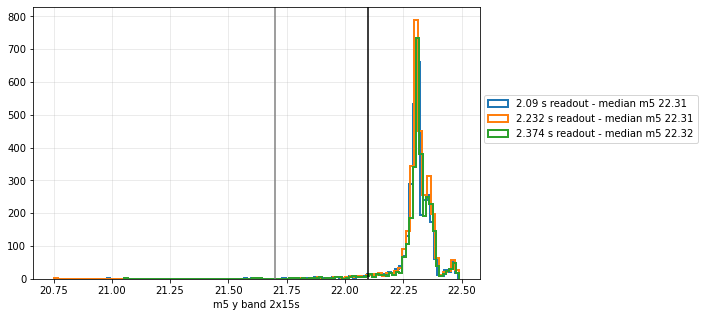

In [41]:
f = 'y'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_215[s][f].values()))
    n,b,p = plt.hist(a, bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_215[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 y band 1x30s')

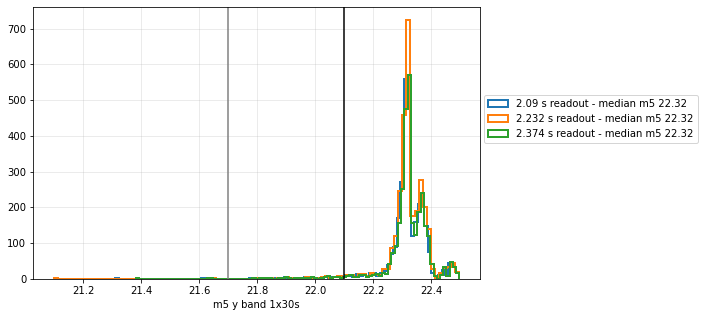

In [43]:
f = 'y'
plt.figure(figsize=(8, 5))
for s in series:
    a = np.concatenate(list(m5_130[s][f].values()))
    n,b,p = plt.hist(a, bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series[s]} s readout - median m5 {med_130[s][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

In [44]:
pd.DataFrame(med_215)

,13057,13040,13060
u,23.604314,23.667763,23.711111
g,24.717985,24.739844,24.752811
r,24.331029,24.343305,24.351235
i,23.909537,23.916932,23.921882
z,23.335690,23.340589,23.343997
y,22.309486,22.313510,22.316136


In [45]:
pd.DataFrame(med_130)

,13057,13040,13060
u,23.749338,23.791655,23.818494
g,24.761491,24.773710,24.780846
r,24.354419,24.361634,24.365916
i,23.927885,23.931896,23.934324
z,23.348783,23.351443,23.353301
y,22.318807,22.320991,22.322363


In [50]:
def subtract_dicts(s1, s2):
    return np.concatenate(list(s1.values())) - np.concatenate(list(s2.values()))

# Effective time:
dtime_215 = {}
dtime_130 = {}
for s in series:
    dtime_215[s] = {}
    dtime_130[s] = {}
    for f in filterlist:
        dmag_215 = subtract_dicts(m5_215[s][f], m5_215[13040][f])
        dmag_130 = subtract_dicts(m5_130[s][f], m5_130[13040][f])
        dtime_215[s][f] = np.sum(np.power(10, 0.8 * (dmag_215)))/3021
        dtime_130[s][f] = np.sum(np.power(10, 0.8 * (dmag_130)))/3021

In [51]:
pd.DataFrame(dtime_215)

,13057,13040,13060
u,0.898155,1.0,1.080450
g,0.962473,1.0,1.026420
r,0.979004,1.0,1.014468
i,0.984362,1.0,1.010718
z,0.989090,1.0,1.007487
y,0.991211,1.0,1.006040


In [52]:
# more or less 
SRD_time_distribution = pd.Series({'u': 0.068, 'g': 0.097, 'r': 0.223, 'i': 0.223, 'z': 0.194, 'y': 0.194})
weighted_dtime_215 = {}
weighted_dtime_130 = {}
for s in series:
    weighted_dtime_215[s] = 0
    weighted_dtime_130[s] = 0
    for f in filterlist:
        weighted_dtime_215[s] += (dtime_215[s][f] * SRD_time_distribution[f])
        weighted_dtime_130[s] += (dtime_130[s][f] * SRD_time_distribution[f])

In [53]:
pd.DataFrame(weighted_dtime_215, index=['weighted teff 2x15s'])

,13057,13040,13060
weighted teff 2x15s,0.976443,0.999,1.015274


In [54]:
pd.DataFrame(weighted_dtime_130, index=['weighted teff 1x30s'])

,13057,13040,13060
weighted teff 1x30s,0.985911,0.999,1.008327


In [55]:
# 1x30s u band + 2x15s grizy
weighted_dtime = {}
for s in series:
    weighted_dtime[s] = (dtime_130[s]['u'] * SRD_time_distribution['u'])
    for f in ['g', 'r', 'i', 'z', 'y']:
        weighted_dtime[s] += (dtime_215[s][f] * SRD_time_distribution[f])
pd.DataFrame(weighted_dtime, index=['weighted teff 30u/2x15grizy'])

,13057,13040,13060
weighted teff 30u/2x15grizy,0.978619,0.999,1.013338


In [56]:
print('percent improvement going to 2.232s readout from 2.090s', 
      (weighted_dtime[13057] - weighted_dtime[13040])*-100)

percent improvement going to 2.232s readout from 2.090s 2.038113719444956


In [57]:
print('time cost for a single visit: (39s -> 39.2s -> 39.4)', (39.2/39*100)-100, (39.4/39*100)-100)

time cost for a single visit: (39s -> 39.2s -> 39.4) 0.512820512820511 1.025641025641022


Text(0.5, 0, 'Readnoise')

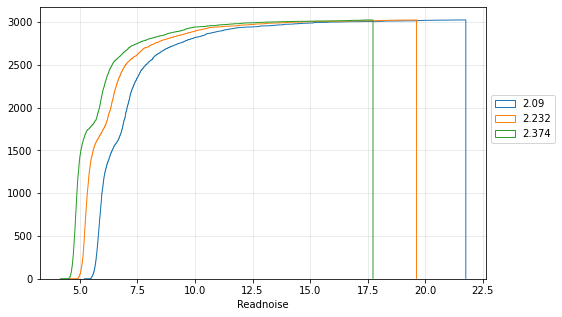

In [58]:
# Readnoise distribution
readnoise = {}
readnoise_vals = {}
for s in series:
    fname = f'readnoise_{s}.pkl'
    readnoise[s] = pd.read_pickle(fname)
    readnoise_vals[s] = []
    for k in readnoise[s]:
        readnoise_vals[s] += readnoise[s][k]
    #omit known bad channel
    readnoise_vals[s] = [r for r in readnoise_vals[s] if r < 80]
    
plt.figure(figsize=(8,5))
for s in series:
    n,b,p = plt.hist(readnoise_vals[s], bins=189*16, histtype='step', cumulative=1,
                    label=series[s])
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.xlabel('Readnoise')

In [60]:
for s in series:
    print(s, np.mean(readnoise_vals[s]))

13057 7.052831421683145
13040 6.2892120341137865
13060 5.7525594322520055


In [ ]:
s = 13057
plt.figure(figsize=(8, 3))
for k in readnoise[s]:
    n,b,p = plt.hist(readnoise[s][k], bins=np.arange(3, 20, .1), histtype='step', cumulative=0, label=k)
plt.xlabel('readnoise')
plt.title('13057')

s = 13060
plt.figure(figsize=(8, 3))
for k in readnoise[s]:
    n,b,p = plt.hist(readnoise[s][k], bins=np.arange(3, 20, .1), histtype='step', cumulative=0, label=k)
plt.xlabel('readnoise')
plt.title('13060')

In [ ]:
rad = []
effarea = []
rdnoise = []
s = 13040
dfPath = os.path.join('m5_output', f'adf_{s}.csv')
adf = pd.read_csv(dfPath, index_col=0)
# Join all the amp together into a big list for the whole focal plane
# Pick one of the m5 values to reformat like this too (so that we reject the same points)
dfPath = os.path.join('m5_output', f'm5df_{s}.csv')
df = pd.read_csv(dfPath, index_col=0)
for k in adf:
    rad += adf[k].apply(literal_eval)['radDeg']
    effarea += adf[k].apply(literal_eval)['effarea']
    rdnoise += adf[k].apply(literal_eval)['readnoise']
m5 = []
for k in df:
    m5 += df[k].apply(literal_eval)['z']
rad = np.array(rad)
effarea = np.array(effarea)
m5 = np.array(m5)
rdnoise = np.array(rdnoise)

In [ ]:
plt.plot(rad, effarea, 'k.')

In [ ]:
mask = np.where((m5 > 20) | (rdnoise > 80))
plt.plot(rad, np.log10(effarea)/np.log10(np.mean(effarea)), 'r.')
plt.plot(rad[mask], m5[mask]-np.mean(m5[mask]), 'k.')
plt.xlabel("Radius from center of fov (deg)")

In [ ]:
adf.index

In [ ]:
adf.columns